In [ ]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ticker=['AAPL','GOOG','MSFT','AMZN']

In [ ]:
end_date=date.today()

In [ ]:
start_date=date(end_date.year-1,end_date.month,end_date.day)

In [ ]:
start_date,end_date

(datetime.date(2022, 6, 30), datetime.date(2023, 6, 30))

In [ ]:
for stock in ticker:
    globals()[stock]= yf.download(stock,start_date,end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719711,73353800
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071671,74064300
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800


In [ ]:

sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.845738,156.725179,153.281594,155.150079,154.718487,7.226121e+07
std,14.484150,14.274663,14.802955,14.571539,14.680260,2.241827e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.519590e+07
25%,144.345001,146.705002,142.750000,145.169998,144.497894,5.586760e+07
50%,152.380005,154.470001,150.800003,152.869995,152.339294,6.874980e+07
75%,165.139999,166.714996,164.209999,165.595001,165.122765,8.161725e+07
max,189.080002,190.070007,188.940002,189.589996,189.589996,1.647624e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-30 to 2023-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

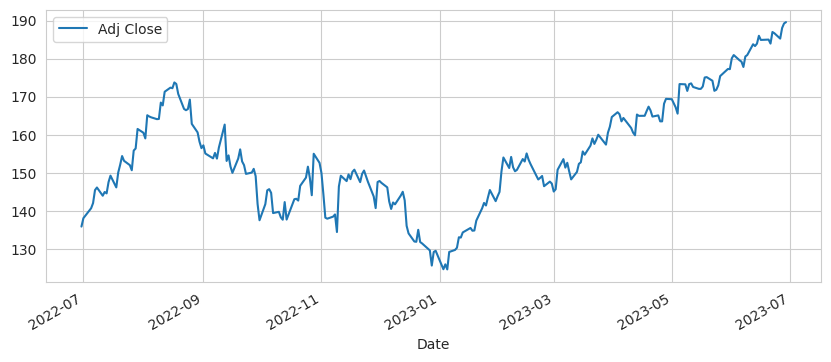

In [ ]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

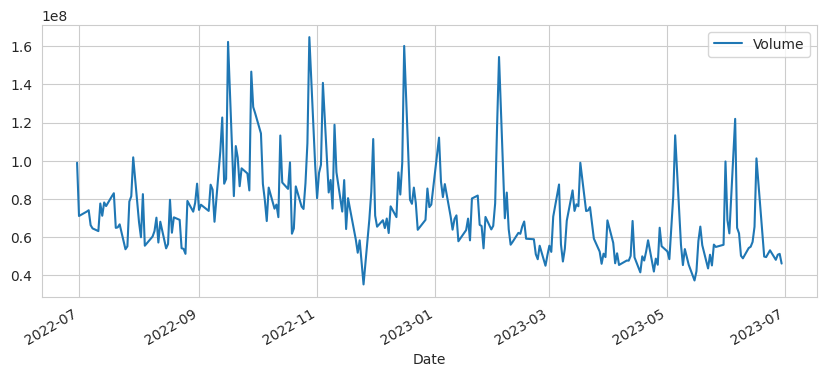

In [ ]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [ ]:
movingAverage_days=[10,20,50]

In [ ]:
for movingAverage in movingAverage_days:
  column_name="MA for %s days" %(str(movingAverage))
  AAPL[column_name]=AAPL['Adj Close'].rolling(movingAverage).mean()

<Axes: xlabel='Date'>

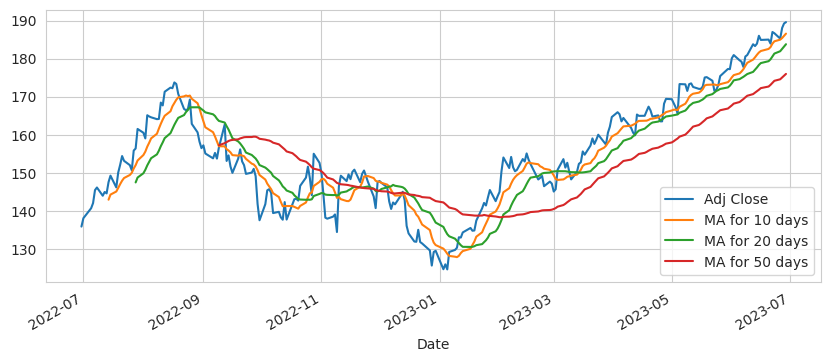

In [ ]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

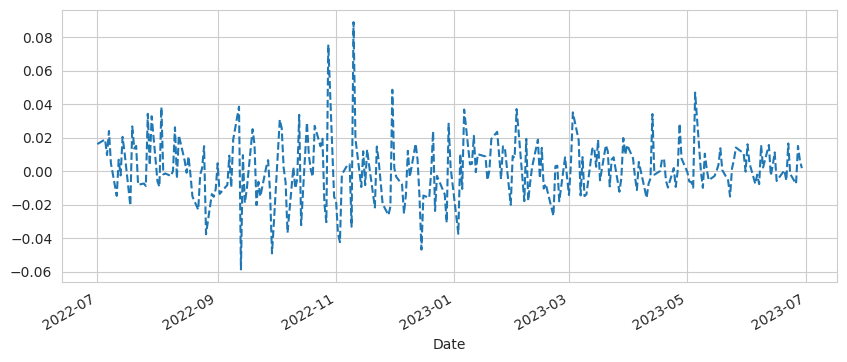

In [ ]:
  AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

  AAPL['Daily Return'].plot(figsize=(10,4), linestyle='--')

<ipython-input-18-e150e6c514f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

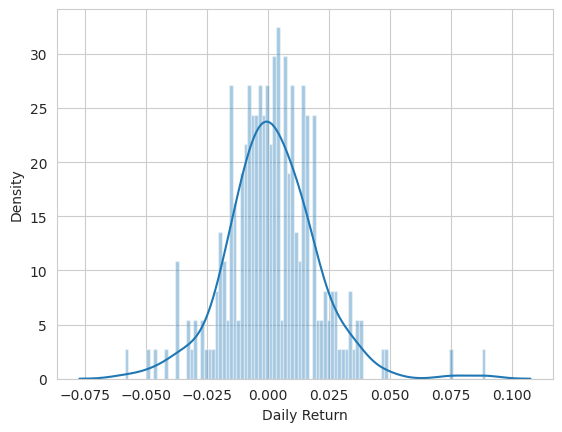

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [ ]:
closing_df=yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-30,135.908463,106.209999,109.372498,254.371201
2022-07-01,138.105331,109.559998,109.081001,257.094849
2022-07-05,140.719742,113.500000,113.887001,260.333527
2022-07-06,142.071655,114.330002,115.213501,263.661377
2022-07-07,145.481308,116.330002,119.306000,265.830444


In [ ]:
ticker_returns= closing_df.pct_change()

In [ ]:
ticker_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-30,NaN,NaN,NaN,NaN
2022-07-01,0.016164,0.031541,-0.002665,0.010707
2022-07-05,0.018931,0.035962,0.044059,0.012597
2022-07-06,0.009607,0.007313,0.011648,0.012783
2022-07-07,0.024000,0.017493,0.035521,0.008227


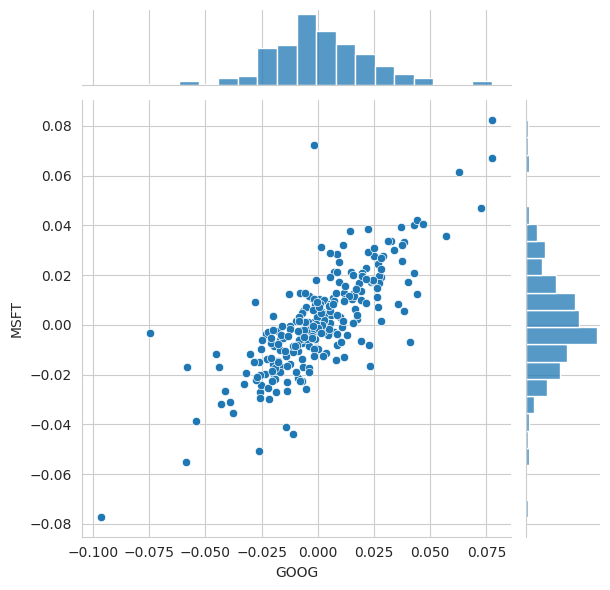

In [ ]:
sns.jointplot(x='GOOG',y='MSFT', kind= 'scatter', data=ticker_returns)

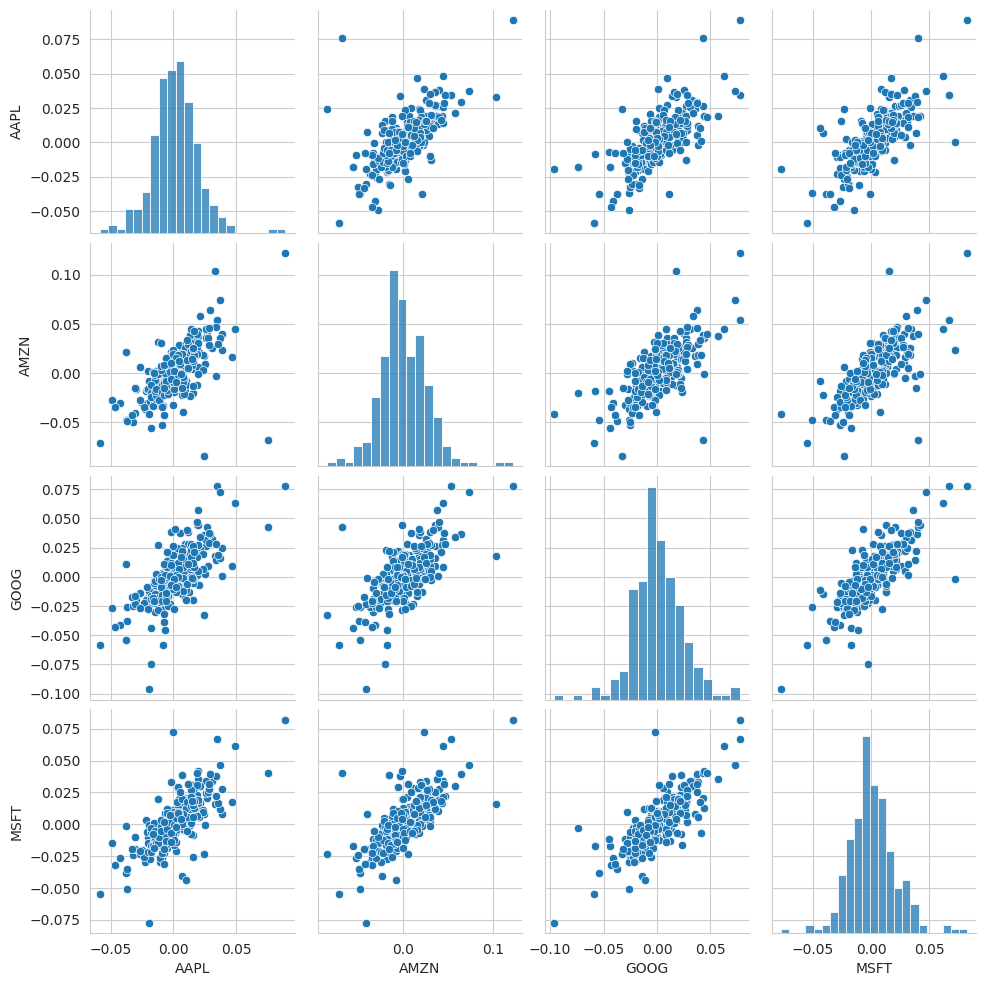

In [ ]:
sns.pairplot(ticker_returns.dropna())

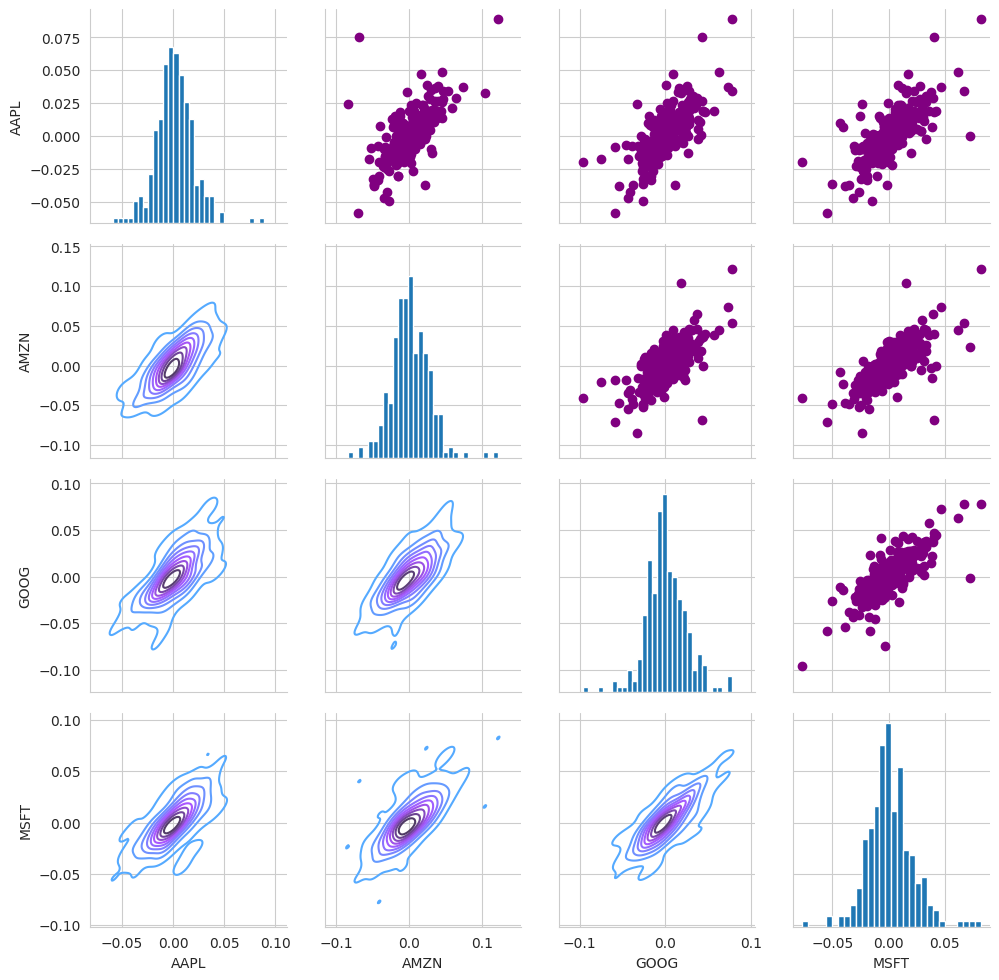

In [ ]:
 returns_fig=sns.PairGrid(ticker_returns.dropna())
 returns_fig.map_upper(plt.scatter,color='purple')
 returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
 returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

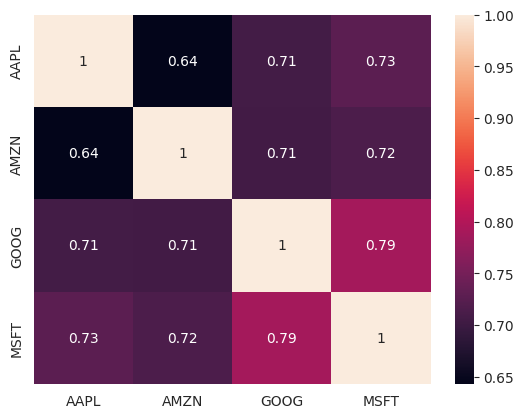

In [ ]:
sns.heatmap(ticker_returns.dropna().corr(),annot=True)

<Axes: >

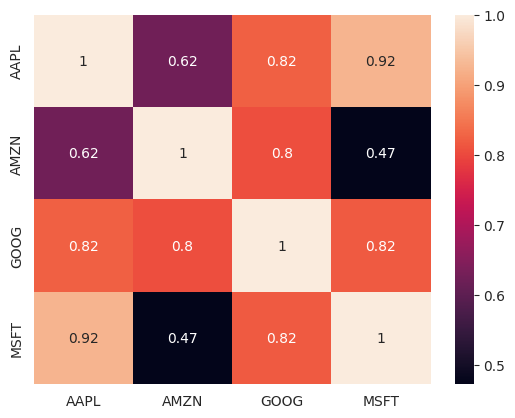

In [ ]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [ ]:
rets = ticker_returns.dropna()

**RISK ANALYSIS **

In [ ]:
area= np.pi*20

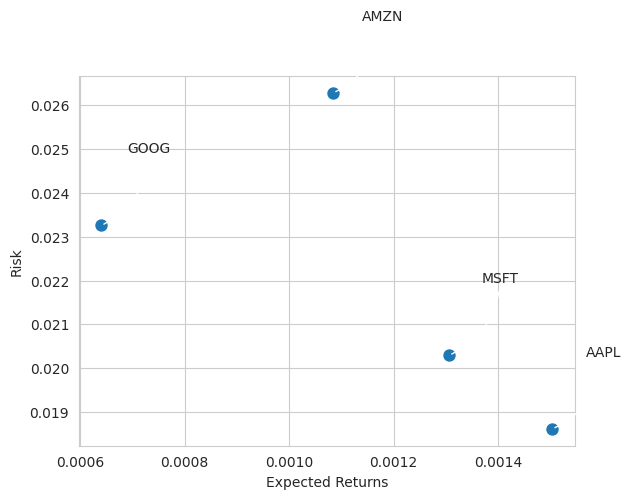

In [ ]:
plt.scatter(rets.mean(),rets.std(), s= area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
  plt.annotate(
      label,
      xy=(x,y),xytext=(50,50),
      textcoords='offset points',ha='right',va='bottom',
      arrowprops= dict(arrowstyle='-',connectionstyle= 'arc3,rad=-0.3')
  )

# **VALUE AT RISK**

<ipython-input-39-3d9191e504a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

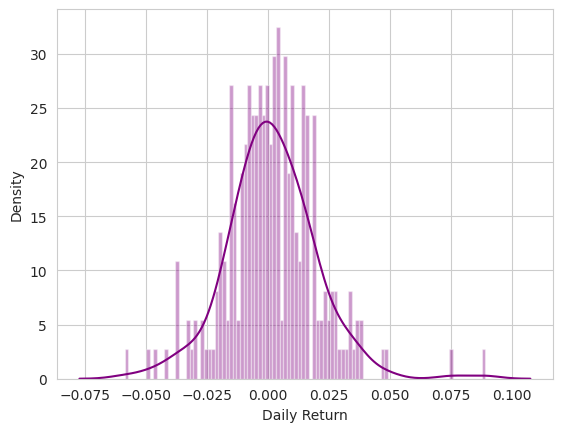

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

In [ ]:
rets['AAPL'].quantile(0.05)

-0.028527590287250784

# **VALUE AT RISK USING MONTE CARLO METHOD**

In [ ]:
days=365

dt=1/days

mu=rets.mean()['GOOG']

sigma= rets.std()['GOOG']

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
  price=np.zeros(days)
  price[0]=start_price

  shock=np.zeros(days)
  drift=np.zeros(days)

  for x in range(1,days):
    shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
    drift[x]=mu*dt
    price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))

  return price


In [ ]:
GOOG.head()
import sys

Text(0.5, 1.0, 'Monte Carlo Analysis for GOOGLE')

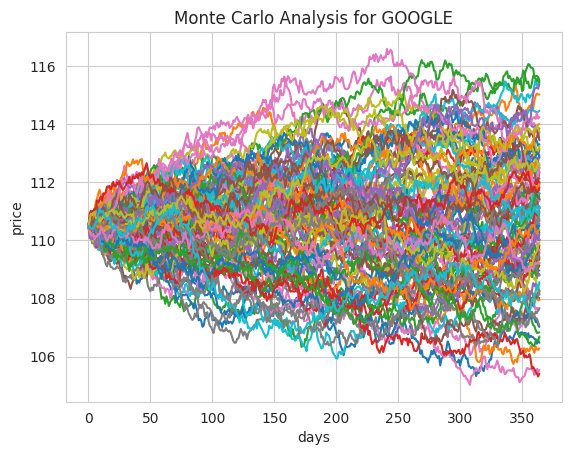

In [ ]:
start_price=110.499496

for run in range(100):
  plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('days')
plt.ylabel('price')
plt.title('Monte Carlo Analysis for GOOGLE')

In [ ]:
runs=10000

simulation= np.zeros(runs)

for run in range(runs):
  simulation[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]


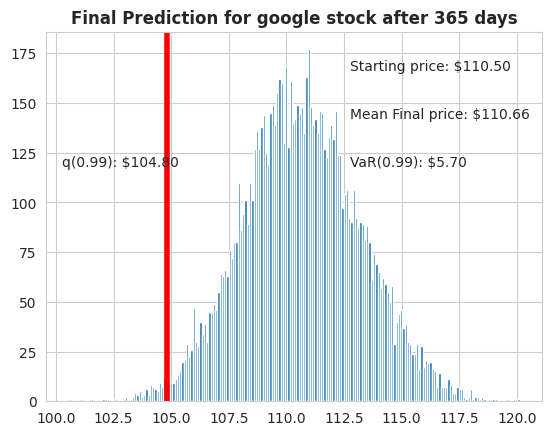

In [ ]:
q=np.percentile(simulation,1)

plt.hist(simulation,bins=200)

#starting price
plt.figtext(0.6,0.8, s="Starting price: $%.2f" %start_price)

#mean ending prie
plt.figtext(0.6,0.7, "Mean Final price: $%.2f" %simulation.mean())

#varicance of  the price
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price-q))

#display 1%quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

#plot a line at the 1 percent quantile result
plt.axvline(x=q, linewidth=4,color='r' )

#Title
plt.title("Final Prediction for google stock after %s days" %days, weight='bold');